In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#


In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Caborca.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,30/01/2018,20:00,105,110,12.27,31.9,30.5,19,992.9,0.0,718.5
1,30/01/2018,21:00,167,177,12.02,34.7,32.0,18,992.1,0.0,608.8
2,30/01/2018,22:00,190,202,36.35,70.2,30.4,20,991.7,0.0,457.3
3,30/01/2018,23:00,192,199,33.86,65.9,27.6,26,991.4,0.0,317.3
4,31/01/2018,00:00,190,198,27.81,51.4,25.7,26,991.3,0.0,89.3


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,105,110,12.27,31.9,30.5,19,992.9,0.0,718.5,2018-01-30 20:00:00
1,167,177,12.02,34.7,32.0,18,992.1,0.0,608.8,2018-01-30 21:00:00
2,190,202,36.35,70.2,30.4,20,991.7,0.0,457.3,2018-01-30 22:00:00
3,192,199,33.86,65.9,27.6,26,991.4,0.0,317.3,2018-01-30 23:00:00
4,190,198,27.81,51.4,25.7,26,991.3,0.0,89.3,2018-01-31 00:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.0,167.000000
mean,193.149701,206.317365,14.869222,30.38982,18.194611,35.035928,993.376048,0.0,181.697605
std,92.674559,89.359575,6.487049,11.75968,7.245981,9.342152,2.049396,0.0,255.268826
min,20.000000,29.000000,1.230000,10.20000,6.700000,18.000000,988.800000,0.0,0.000000
25%,97.000000,130.500000,10.865000,21.90000,11.550000,27.000000,992.100000,0.0,0.000000
50%,197.000000,212.000000,13.720000,26.30000,16.800000,36.000000,993.200000,0.0,0.000000
75%,277.000000,277.000000,17.055000,37.25000,25.250000,42.000000,995.000000,0.0,374.000000
max,356.000000,353.000000,36.350000,70.20000,32.000000,55.000000,997.900000,0.0,738.200000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
52,207,217,23.4,44.6,24.2,32,993.7,0.0,126.8,2018-02-02 00:00:00
77,196,193,18.1,35.6,24.3,27,994.7,0.0,3.2,2018-02-03 01:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      193.149701
DIRR      206.317365
VELS       14.869222
VELR       30.389820
TEMP       18.194611
HR         35.035928
PB        993.376048
PREC        0.000000
RADSOL    181.697605
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

18.19461077844312

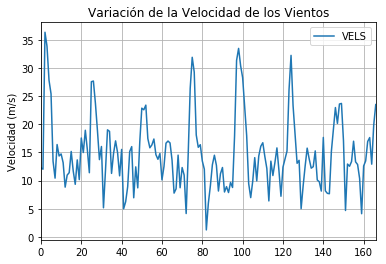

In [12]:
# Gráfica de la velocidades de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Velocidad de los Vientos")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.show()

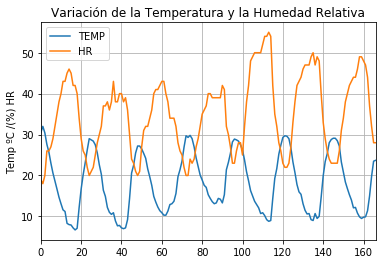

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

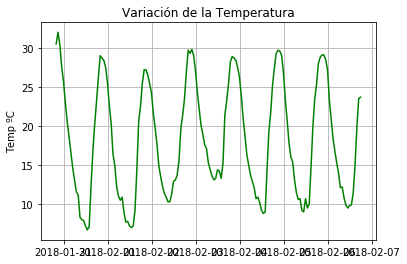

In [20]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="g-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

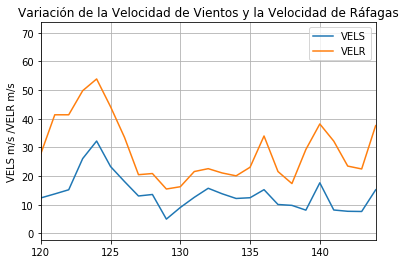

In [15]:
# Gráfica de Velocidad de vientos y Velocidad de ráfagas

df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Velocidad de Vientos y la Velocidad de Ráfagas")
plt.ylabel("VELS m/s /VELR m/s")
plt.xlim( (120, 144) )
plt.grid(True)
plt.show()

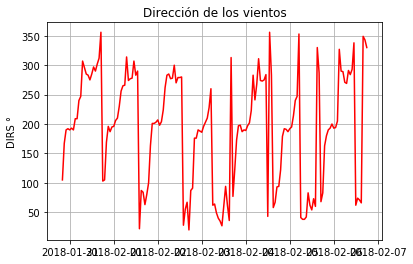

In [17]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="r-")
plt.title("Dirección de los vientos")
plt.ylabel("DIRS °")
plt.grid(True)
plt.show()

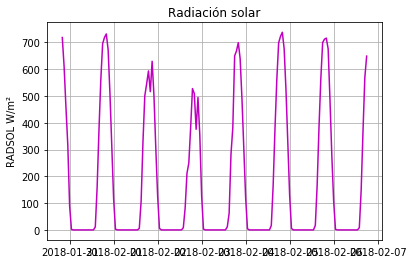

In [18]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="m-")
plt.title("Radiación solar")
plt.ylabel("RADSOL W/m²")
plt.grid(True)
plt.show()

In [19]:
# Realiza un análisis exploratorio de datos
df.describe()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.0,167.000000
mean,193.149701,206.317365,14.869222,30.38982,18.194611,35.035928,993.376048,0.0,181.697605
std,92.674559,89.359575,6.487049,11.75968,7.245981,9.342152,2.049396,0.0,255.268826
min,20.000000,29.000000,1.230000,10.20000,6.700000,18.000000,988.800000,0.0,0.000000
25%,97.000000,130.500000,10.865000,21.90000,11.550000,27.000000,992.100000,0.0,0.000000
50%,197.000000,212.000000,13.720000,26.30000,16.800000,36.000000,993.200000,0.0,0.000000
75%,277.000000,277.000000,17.055000,37.25000,25.250000,42.000000,995.000000,0.0,374.000000
max,356.000000,353.000000,36.350000,70.20000,32.000000,55.000000,997.900000,0.0,738.200000
